In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

from datetime import date
from mpr.reports.cash_index import get_cash_prices

cash_prices = await get_cash_prices(date(2015, 1, 1))

In [2]:
# What were the average prices for the last 10 days?
cash_prices.get(['Daily Avg Price', 'Price Change', 'CME Index', 'Index Change']).tail(10)

,Daily Avg Price,Price Change,CME Index,Index Change
date,,,,
2019-03-13,54.79,1.33,54.13,1.01
2019-03-14,55.97,1.18,55.40,1.27
2019-03-15,56.95,0.98,56.54,1.14
2019-03-18,58.43,1.48,57.54,1.00
2019-03-19,59.98,1.55,59.22,1.68
2019-03-20,61.53,1.55,60.75,1.53
2019-03-21,63.22,1.69,62.41,1.66
2019-03-22,66.27,3.05,64.97,2.56
2019-03-25,68.49,2.22,67.13,2.16


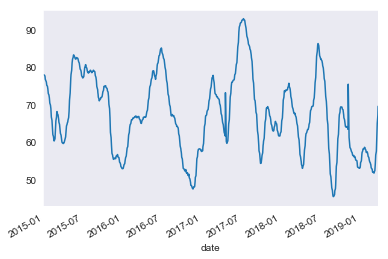

In [3]:
# Plot the CME Index on a chart
cash_prices.get('CME Index').plot()

In [11]:
# view the full report since March
cash_prices['2019-03-01':]

,CME Index,Index Change,Daily Avg Price,Price Change,Negotiated Head Count,Negotiated Carcass Weight,Negotiated Net Price,Market Formula Head Count,Market Formula Carcass Weight,Market Formula Net Price
date,,,,,,,,,,
2019-03-01,51.93,-0.20,51.98,0.12,15820,209.62,48.30,193841,215.46,52.27
2019-03-04,51.94,0.01,51.87,-0.11,8675,206.74,47.19,118060,214.34,52.20
2019-03-05,51.85,-0.09,51.83,-0.04,8504,202.11,46.78,126907,213.58,52.15
2019-03-06,51.75,-0.10,51.67,-0.16,8555,198.16,46.58,125809,214.09,51.99
2019-03-07,51.71,-0.04,51.74,0.07,10792,202.63,46.60,115052,213.97,52.20
2019-03-08,51.98,0.27,52.14,0.40,17749,206.92,46.74,165596,214.61,52.70
2019-03-11,52.38,0.40,52.76,0.62,5293,202.82,46.38,114453,212.53,53.04
2019-03-12,53.12,0.74,53.46,0.70,6475,192.82,47.11,122334,212.52,53.77
2019-03-13,54.13,1.01,54.79,1.33,7863,200.16,47.61,119543,214.37,55.23


In [5]:
from fbprophet import Prophet
import pandas as pd

df = cash_prices['CME Index'].to_frame().reset_index()
df.columns=['ds', 'y']

In [6]:
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(weekly_seasonality=0)
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

/Users/kirke/miniconda3/envs/mpr/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


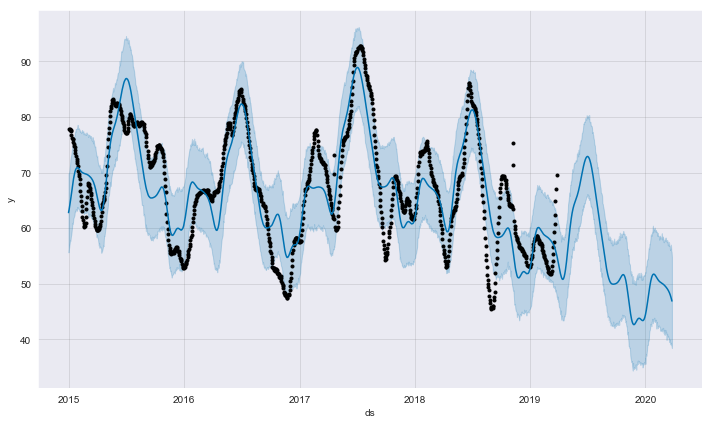

In [7]:
fig = m.plot(forecast)

In [8]:
predictions = forecast.set_index(forecast['ds']).loc['2019-4-15':'2019-8-1']
predictions[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2019-04-15,50.80,43.47,58.40
2019-04-16,50.85,43.39,58.32
2019-04-17,50.96,43.41,58.18
2019-04-18,51.11,43.97,57.94
2019-04-19,51.31,44.20,58.51
2019-04-20,51.56,44.12,58.39
2019-04-21,51.85,44.59,58.99
2019-04-22,52.19,44.51,58.81
2019-04-23,52.57,44.83,59.89


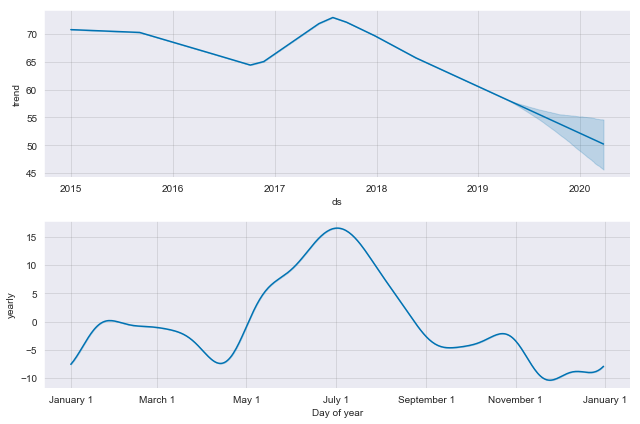

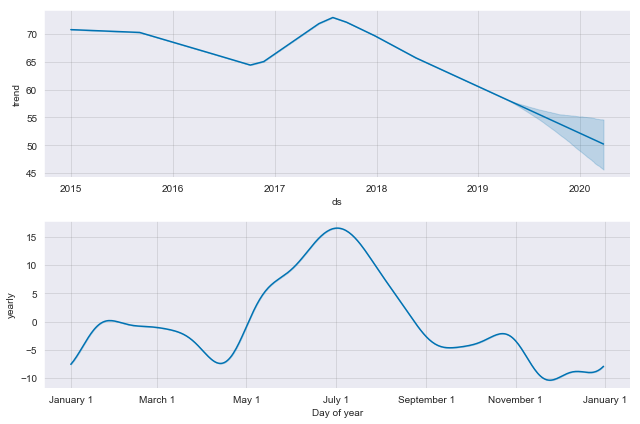

In [9]:
m.plot_components(forecast)

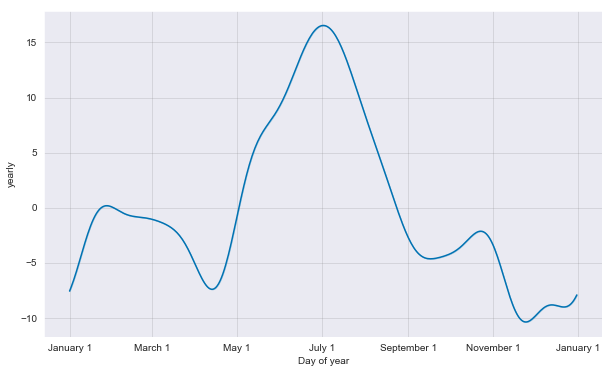

In [10]:
from fbprophet.plot import plot_yearly
plot_yearly(m)